---
title: Geographic Analysis
---

# Introduction

bla balal


In [1]:

import findspark
findspark.init()

from pyspark.sql import SparkSession
import pandas as pd
import plotly.express as px
import plotly.io as pio
import numpy as np

np.random.seed(42)

pio.renderers.default = "notebook"

# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
print("---This is Diagnostic check, No need to print it in the final doc---")

df.printSchema() # comment this line when rendering the submission
df.show(5)

Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/06/22 01:56:10 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


---This is Diagnostic check, No need to print it in the final doc---
root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATIO

25/06/22 01:56:28 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+--------------------+-----------------+----------------------+----------+--------+---------+--------+--------------------+--------------------+--------------------+-----------+-------------------+--------------------+--------------------+---------------+----------------+--------+--------------------+-----------+-------------------+----------------+---------------------+-------------+-------------------+-------------+------------------+---------------+--------------------+--------------------+--------------------+-------------+------+-----------+----------------+-------------------+---------+-----------+--------------------+--------------------+-------------+------+--------------+-----+--------------------+-----+----------+---------------+--------------------+---------------+--------------------+------------+--------------------+------------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+--------------------+------+------

In [3]:
## Listing Columns So We Can Reference them in Visuals

import pandas as pd
df = pd.read_csv("./data/lightcast_job_postings.csv")
print(df.columns.tolist())

/tmp/ipykernel_3323/3265774581.py:4: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



['ID', 'LAST_UPDATED_DATE', 'LAST_UPDATED_TIMESTAMP', 'DUPLICATES', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'URL', 'ACTIVE_URLS', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2', 'NAICS2_NAME', 'NAICS3', 'NAICS3_NAME', 'NAICS4', 'NAICS4_NAME', 'NAICS5', 'NAICS5_NAME', 'NAICS6', 'NAIC

In [3]:
import pandas as pd

df = pd.read_csv("./data/lightcast_job_postings.csv")

columns_to_drop = [
    "ID", "URL", "ACTIVE_URLS", "DUPLICATES", "LAST_UPDATED_TIMESTAMP",
    "NAICS2", "NAICS3", "NAICS4", "NAICS5", "NAICS6",
    "SOC_2", "SOC_3", "SOC_5"
]

df.drop(columns=columns_to_drop, inplace=True)


/tmp/ipykernel_2210/304705447.py:3: DtypeWarning:

Columns (19,30) have mixed types. Specify dtype option on import or set low_memory=False.



In [4]:
print(df.columns.tolist())

['LAST_UPDATED_DATE', 'POSTED', 'EXPIRED', 'DURATION', 'SOURCE_TYPES', 'SOURCES', 'ACTIVE_SOURCES_INFO', 'TITLE_RAW', 'BODY', 'MODELED_EXPIRED', 'MODELED_DURATION', 'COMPANY', 'COMPANY_NAME', 'COMPANY_RAW', 'COMPANY_IS_STAFFING', 'EDUCATION_LEVELS', 'EDUCATION_LEVELS_NAME', 'MIN_EDULEVELS', 'MIN_EDULEVELS_NAME', 'MAX_EDULEVELS', 'MAX_EDULEVELS_NAME', 'EMPLOYMENT_TYPE', 'EMPLOYMENT_TYPE_NAME', 'MIN_YEARS_EXPERIENCE', 'MAX_YEARS_EXPERIENCE', 'IS_INTERNSHIP', 'SALARY', 'REMOTE_TYPE', 'REMOTE_TYPE_NAME', 'ORIGINAL_PAY_PERIOD', 'SALARY_TO', 'SALARY_FROM', 'LOCATION', 'CITY', 'CITY_NAME', 'COUNTY', 'COUNTY_NAME', 'MSA', 'MSA_NAME', 'STATE', 'STATE_NAME', 'COUNTY_OUTGOING', 'COUNTY_NAME_OUTGOING', 'COUNTY_INCOMING', 'COUNTY_NAME_INCOMING', 'MSA_OUTGOING', 'MSA_NAME_OUTGOING', 'MSA_INCOMING', 'MSA_NAME_INCOMING', 'NAICS2_NAME', 'NAICS3_NAME', 'NAICS4_NAME', 'NAICS5_NAME', 'NAICS6_NAME', 'TITLE', 'TITLE_NAME', 'TITLE_CLEAN', 'SKILLS', 'SKILLS_NAME', 'SPECIALIZED_SKILLS', 'SPECIALIZED_SKILLS_NAM

In [5]:
!pip install missingno

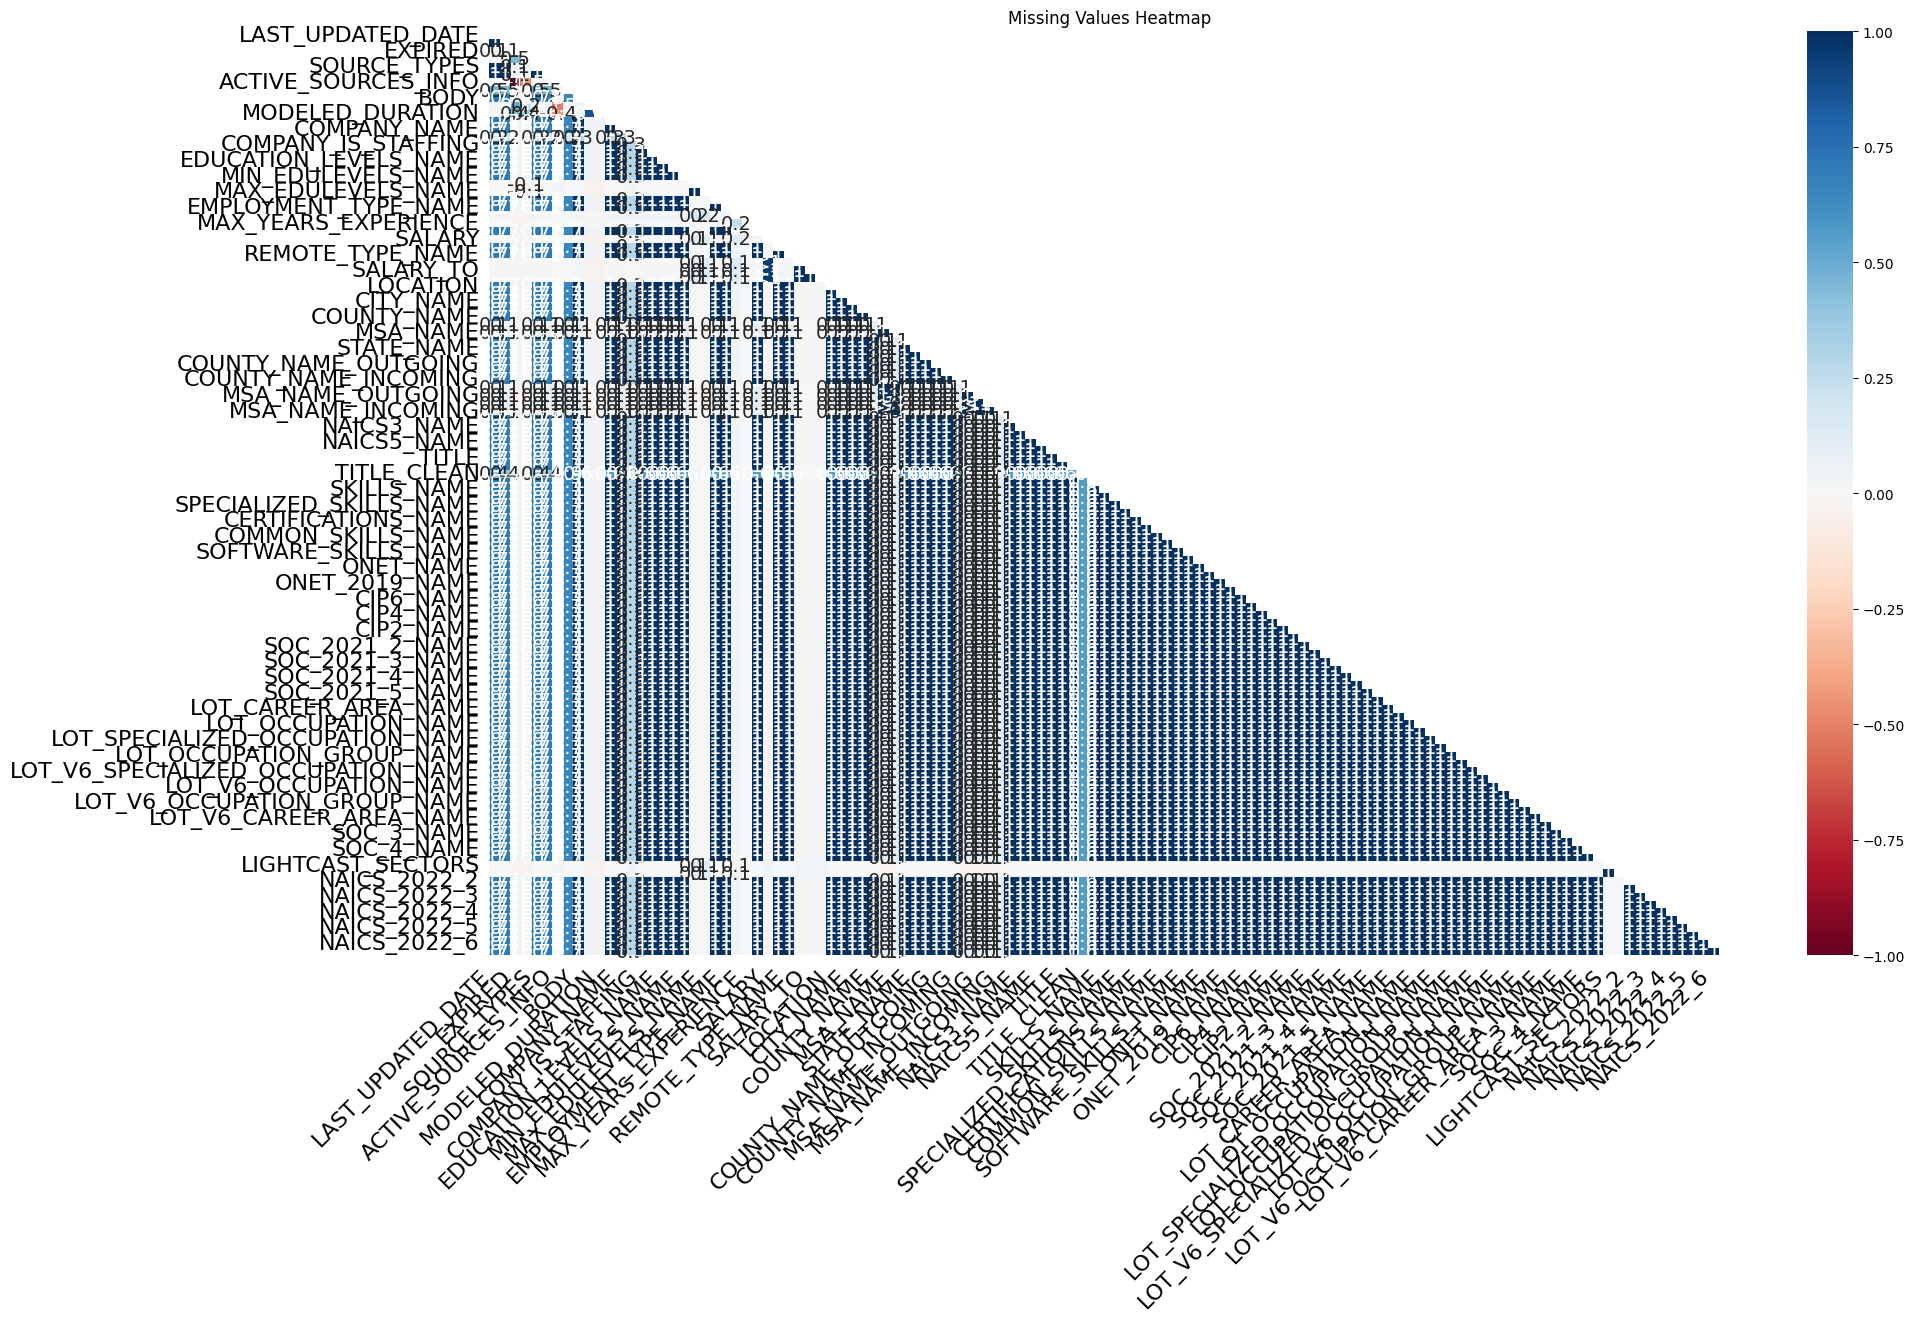

In [6]:
import missingno as msno
import matplotlib.pyplot as plt
# Visualize missing values
msno.heatmap(df)
plt.title("Missing Values Heatmap")
plt.show()

# Drop columns with >50% missing values
df.dropna(thresh=len(df) * 0.5, axis=1, inplace=True)

# Fill only the columns you actually have
if 'Industry' in df.columns:
    df["Industry"].fillna("Unknown", inplace=True)
    df["Salary"].fillna(df["Salary"].median(), inplace=True)

In [7]:

df = df.drop_duplicates(subset=["TITLE", "COMPANY", "LOCATION", "POSTED"], keep="first")

In [16]:
df = df[df['NAICS_2022_2_NAME'] != 'Unclassified Industry']

In [21]:

# Step 2: Define AI classification lists
ai_impacted_naics = [31, 32, 33, 42, 44, 45, 51, 52, 54, 55, 56]
non_ai_impacted_naics = [11, 21, 22, 23, 48, 49, 61, 62, 71, 72]


In [31]:
def label_ai_impact(naics):
    try:
        code = int(naics)
        if code in ai_impacted_naics:
            return "AI-Impacted"
        elif code in non_ai_impacted_naics:
            return "Non-AI-Impacted"
        else:
            return "Unclassified"
    except:
        return "Unclassified"

In [32]:
df['AI_IMPACTED'] = df['NAICS_2022_2'].apply(label_ai_impact)
# Filter only AI and Non-AI impacted
df = df[df["AI_IMPACTED"].isin(["AI-Impacted", "Non-AI-Impacted"])]

# Now split the data
ai_df = df[df["AI_IMPACTED"] == "AI-Impacted"][
    ["STATE_NAME", "NAICS_2022_2", "NAICS_2022_2_NAME", "LOT_SPECIALIZED_OCCUPATION_NAME"]
]

non_ai_df = df[df["AI_IMPACTED"] == "Non-AI-Impacted"][
    ["STATE_NAME", "NAICS_2022_2", "NAICS_2022_2_NAME", "LOT_SPECIALIZED_OCCUPATION_NAME"]
]


/tmp/ipykernel_2210/3931456421.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [35]:
from IPython.display import display

print("AI-Impacted Industries:")
display(ai_df)

print("\nNon-AI-Impacted Industries:")
display(non_ai_df)


AI-Impacted Industries:


,STATE_NAME,NAICS_2022_2,NAICS_2022_2_NAME,LOT_SPECIALIZED_OCCUPATION_NAME
0,Arkansas,44.0,Retail Trade,General ERP Analyst / Consultant
1,Maine,56.0,Administrative and Support and Waste Managemen...,Oracle Consultant / Analyst
2,Texas,52.0,Finance and Insurance,Data Analyst
3,Arizona,52.0,Finance and Insurance,Data Analyst
5,Arkansas,51.0,Information,Data Analyst
...,...,...,...,...
72493,Virginia,54.0,"Professional, Scientific, and Technical Services",Data Analyst
72494,Massachusetts,51.0,Information,Enterprise Architect
72495,Michigan,56.0,Administrative and Support and Waste Managemen...,Data Analyst
72496,Maine,51.0,Information,Data Analyst



Non-AI-Impacted Industries:


,STATE_NAME,NAICS_2022_2,NAICS_2022_2_NAME,LOT_SPECIALIZED_OCCUPATION_NAME
15,Massachusetts,61.0,Educational Services,Data Analyst
18,Alabama,62.0,Health Care and Social Assistance,Enterprise Architect
37,Virginia,62.0,Health Care and Social Assistance,Data Analyst
77,Ohio,23.0,Construction,Enterprise Architect
94,Texas,61.0,Educational Services,Business Analyst (General)
...,...,...,...,...
72450,Oklahoma,48.0,Transportation and Warehousing,Financial Data Analyst
72451,South Carolina,62.0,Health Care and Social Assistance,Data Analyst
72460,California,11.0,"Agriculture, Forestry, Fishing and Hunting",Data Analyst
72479,Wyoming,61.0,Educational Services,Data Analyst


In [36]:
# Step 1: Count total jobs by state
total_jobs_by_state = df.groupby('STATE_NAME').size().rename('Total_Jobs')


In [38]:
# Step 2: Count AI-impacted jobs by state
ai_jobs_by_state = df[df['AI_IMPACTED'] == 'AI-Impacted'].groupby('STATE_NAME').size().rename('AI_Impacted_Jobs')
# Step 3: Merge the two counts into a single DataFrame
ai_impact_summary = pd.concat([total_jobs_by_state, ai_jobs_by_state], axis=1).fillna(0)


In [39]:
# Step 4: Calculate percentage of AI-impacted jobs
ai_impact_summary['AI_Impact_Percentage'] = (ai_impact_summary['AI_Impacted_Jobs'] / ai_impact_summary['Total_Jobs']) * 100


In [40]:
# Step 5: Sort states by highest percentage
ai_impact_summary_sorted = ai_impact_summary.sort_values(by='AI_Impact_Percentage', ascending=False)

In [41]:
# Step 6: Display the top 10 states (or all if you prefer)
from IPython.display import display
display(ai_impact_summary_sorted.head(10))

,Total_Jobs,AI_Impacted_Jobs,AI_Impact_Percentage
STATE_NAME,,,
New Jersey,2156,1976,91.651206
Vermont,201,183,91.044776
Idaho,399,361,90.476190
North Carolina,2225,2013,90.471910
Connecticut,723,654,90.456432
Hawaii,183,165,90.163934
"Washington, D.C. (District of Columbia)",933,839,89.924973
Wisconsin,852,766,89.906103
Illinois,2802,2515,89.757316


In [6]:
# Step 1: Clean and convert date columns
df = df[df['NAICS_2022_2_NAME'] != 'Unclassified Industry']
df['POSTED'] = pd.to_datetime(df['POSTED'], errors='coerce')
df['EXPIRED'] = pd.to_datetime(df['EXPIRED'], errors='coerce')

# Drop rows with missing POSTED or EXPIRED dates
df = df.dropna(subset=['POSTED', 'EXPIRED'])


In [9]:
import plotly.express as px

# Count postings per industry
industry_counts = df['NAICS2_NAME'].value_counts().reset_index()
industry_counts.columns = ['NAICS2_NAME', 'count']

# Sort values for better readability
industry_counts = industry_counts.sort_values(by='count', ascending=True)

# Horizontal bar plot
fig = px.bar(
    industry_counts,
    x='count',
    y='NAICS2_NAME',
    orientation='h',
    title='Job Postings by Industry',
    labels={'NAICS2_NAME': 'Industry', 'count': 'Number of Postings'},
    color='count',
    color_continuous_scale='Blues'
)

# Clean layout
fig.update_layout(
    yaxis_title='Industry',
    xaxis_title='Number of Postings',
    title_font_size=20,
    plot_bgcolor='white',
    xaxis=dict(showgrid=True),
    yaxis=dict(showgrid=False)
)

fig.show()


In [43]:
# Extract month from POSTED and EXPIRED
df['POSTED_MONTH'] = df['POSTED'].dt.to_period('M').astype(str)
df['EXPIRED_MONTH'] = df['EXPIRED'].dt.to_period('M').astype(str)

In [76]:
# Step 2: Define AI and non-AI industry codes using NAICS 2-digit level
ai_impacted_naics = [31, 32, 33, 42, 44, 45, 51, 52, 54, 55, 56]
non_ai_impacted_naics = [11, 21, 22, 23, 48, 49, 61, 62, 71, 72]
def label_ai(naics):
    try:
        code = int(naics)
        if code in ai_naics:
            return "AI-Impacted"
        elif code in non_ai_naics:
            return "Non-AI-Impacted"
        else:
            return "Unclassified"
    except:
        return "Unclassified"
    df['AI_IMPACTED'] = df['NAICS_2022_2'].apply(label_ai)
    df = df[df['AI_IMPACTED'] != 'Unclassified']

In [78]:
# Extract posting month
df['POSTED_MONTH'] = df['POSTED'].dt.to_period('M')

# Count jobs by month, state, and AI impact
monthly_counts = (
    df.groupby(['STATE_NAME', 'POSTED_MONTH', 'AI_IMPACTED'])
    .size()
    .reset_index(name='Job_Count')
)


In [ ]:

# Pivot table to split AI vs Non-AI job counts
pivoted = monthly_counts.pivot_table(
    index=['STATE_NAME', 'POSTED_MONTH'],
    columns='AI_IMPACTED',
    values='Job_Count',
    fill_value=0
).reset_index()
# Sort by month for each state
pivoted.sort_values(by=['STATE_NAME', 'POSTED_MONTH'], inplace=True)

In [79]:

# Step 6: Sort and calculate percent growth
pivoted.sort_values(['STATE_NAME', 'POSTED_MONTH'], inplace=True)
pivoted['AI_Growth'] = pivoted.groupby('STATE_NAME')['AI-Impacted'].pct_change() * 100
pivoted['Non_AI_Growth'] = pivoted.groupby('STATE_NAME')['Non-AI-Impacted'].pct_change() * 100

# Drop rows with NaN (typically the first month per state)
pivoted.dropna(subset=['AI_Growth_Pct', 'Non_AI_Growth_Pct'], inplace=True)

# Step 7: Average monthly growth by state
average_growth = pivoted.groupby('STATE_NAME')[['AI_Growth', 'Non_AI_Growth']].mean().reset_index()
print(average_growth)


AI_IMPACTED                               STATE_NAME  AI_Growth  Non_AI_Growth
0                                            Alabama   1.825137      31.250000
1                                             Alaska -18.633952     116.666667
2                                            Arizona   8.845947     -13.677419
3                                           Arkansas  -6.250000      -9.649123
4                                         California  -6.559680     -30.057340
5                                           Colorado   5.324124      -3.195489
6                                        Connecticut -13.587474     -33.333333
7                                           Delaware  -9.814815      20.000000
8                                            Florida -13.261402     -32.946938
9                                            Georgia -11.300198     -29.653680
10                                            Hawaii  -2.547022      25.000000
11                                             Idaho

In [81]:
# Step: Average growth per state and sort by AI job growth
avg_growth = (
    pivoted.groupby('STATE_NAME')[['AI_Growth_Pct', 'Non_AI_Growth_Pct']]
    .mean()
    .reset_index()
    .rename(columns={
        'AI_Growth_Pct': 'Avg_AI_Job_Growth',
        'Non_AI_Growth_Pct': 'Avg_Non_AI_Job_Growth'
    })
    .sort_values(by='Avg_AI_Job_Growth', ascending=False)
)

# Display result
print(avg_growth)


AI_IMPACTED                               STATE_NAME  Avg_AI_Job_Growth  \
25                                           Montana          45.827710   
50                                           Wyoming          35.688406   
48                                     West Virginia          32.985093   
40                                      South Dakota          12.755376   
33                                      North Dakota          11.442652   
36                                            Oregon           1.779482   
16                                          Kentucky           1.127738   
30                                        New Mexico           0.865385   
43                                              Utah           0.158730   
20                                     Massachusetts           0.114257   
44                                           Vermont          -0.238949   
39                                    South Carolina          -0.958592   
17                       

In [85]:
# Top 10 states for AI job growth
top_ai = avg_growth.sort_values(by='Avg_AI_Job_Growth', ascending=False).head(10)
print("🔹 Top 10 States for AI Job Growth:")
print(top_ai)

# Top 10 states for Non-AI job growth
top_non_ai = avg_growth.sort_values(by='Avg_Non_AI_Job_Growth', ascending=False).head(10)
print("\n🔹 Top 10 States for Non-AI Job Growth:")
print(top_non_ai)

🔹 Top 10 States for AI Job Growth:
AI_IMPACTED     STATE_NAME  Avg_AI_Job_Growth  Avg_Non_AI_Job_Growth
25                 Montana          45.827710              77.777778
50                 Wyoming          35.688406                    inf
48           West Virginia          32.985093              53.333333
40            South Dakota          12.755376             220.833333
33            North Dakota          11.442652                    inf
36                  Oregon           1.779482               1.851852
16                Kentucky           1.127738               4.583333
30              New Mexico           0.865385              43.452381
43                    Utah           0.158730              -0.185109
20           Massachusetts           0.114257              -5.088023

🔹 Top 10 States for Non-AI Job Growth:
AI_IMPACTED     STATE_NAME  Avg_AI_Job_Growth  Avg_Non_AI_Job_Growth
50                 Wyoming          35.688406                    inf
33            North Dakota  

In [86]:
import numpy as np

# Step 1: Replace infinite values (result of division by zero) with NaN
pivoted.replace([np.inf, -np.inf], np.nan, inplace=True)

# Step 2: Drop rows with missing percentage growth values
pivoted.dropna(subset=['AI_Growth_Pct', 'Non_AI_Growth_Pct'], inplace=True)

# Step 3: Group by state and calculate average percent growth
avg_growth = pivoted.groupby('STATE_NAME')[['AI_Growth_Pct', 'Non_AI_Growth_Pct']].mean().reset_index()

# Step 4: Sort states by AI and Non-AI growth
ranked = avg_growth.sort_values(by=['AI_Growth_Pct', 'Non_AI_Growth_Pct'], ascending=False)

# Step 5: Display top states for AI and Non-AI job growth
from IPython.display import display
print("Top states by AI job growth:")
display(ranked[['STATE_NAME', 'AI_Growth_Pct']].head(10))

print("\nTop states by Non-AI job growth:")
display(ranked[['STATE_NAME', 'Non_AI_Growth_Pct']].sort_values(by='Non_AI_Growth_Pct', ascending=False).head(10))


Top states by AI job growth:


AI_IMPACTED,STATE_NAME,AI_Growth_Pct
50,Wyoming,78.532609
25,Montana,45.827710
48,West Virginia,32.985093
40,South Dakota,12.755376
36,Oregon,1.779482
16,Kentucky,1.127738
30,New Mexico,0.865385
43,Utah,0.158730
20,Massachusetts,0.114257
44,Vermont,-0.238949



Top states by Non-AI job growth:


AI_IMPACTED,STATE_NAME,Non_AI_Growth_Pct
33,North Dakota,533.333333
40,South Dakota,220.833333
38,Rhode Island,94.166667
25,Montana,77.777778
50,Wyoming,75.000000
3,Arkansas,65.789474
1,Alaska,53.968254
48,West Virginia,53.333333
11,Idaho,47.070707
30,New Mexico,43.452381


In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 9: Visualize
plt.figure(figsize=(14, 6))
avg_growth[['AI_Growth', 'Non_AI_Growth']].head(10).plot(kind='bar')
plt.title('Average Monthly Job Growth (Top 10 States) for AI vs. Non-AI Careers')
plt.ylabel('Average Monthly Job Growth')
plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(True)
plt.show()

NameError: name 'avg_growth' is not defined

<Figure size 1400x600 with 0 Axes>

In [5]:
# Filter for Boston, MA and Austin, TX
selected_state = ['California', 'Florida', 'Massachusetts', 'Texas', 'New York']
filtered_df = df[df['STATE_NAME'].isin(selected_state)]

# Further filter for NAICS_2022_6 = 518210 and show relevant columns
final_df = filtered_df[filtered_df['LOT_SPECIALIZED_OCCUPATION_NAME'].str.contains('analyst', case=False, na=False)]
final_df[['STATE_NAME', 'NAICS2_NAME', 'NAICS_2022_6', 'LOT_SPECIALIZED_OCCUPATION_NAME']].head(100)

,STATE_NAME,NAICS2_NAME,NAICS_2022_6,LOT_SPECIALIZED_OCCUPATION_NAME
2,Texas,Finance and Insurance,524291.0,Data Analyst
4,California,Unclassified Industry,999999.0,Oracle Consultant / Analyst
9,New York,"Professional, Scientific, and Technical Services",541511.0,Data Analyst
10,California,Wholesale Trade,423830.0,Data Analyst
15,Massachusetts,Educational Services,611310.0,Data Analyst
...,...,...,...,...
294,Florida,Educational Services,611310.0,SAP Analyst / Admin
295,California,Finance and Insurance,524114.0,Data Analyst
296,New York,Unclassified Industry,999999.0,General ERP Analyst / Consultant
297,Texas,"Professional, Scientific, and Technical Services",541611.0,SAP Analyst / Admin


In [10]:
# Filter for Boston, MA and Austin, TX
selected_state = ['California', 'Florida', 'Massachusetts', 'Texas', 'New York']
filtered_df = df[df['STATE_NAME'].isin(selected_state)]

In [11]:
# Further filter for NAICS_2022_6 = 518210 and show relevant columns
final_df = filtered_df[filtered_df['LOT_SPECIALIZED_OCCUPATION_NAME'].str.contains('analyst', case=False, na=False)]
final_df[['STATE_NAME', 'NAICS2_NAME', 'NAICS_2022_6', 'LOT_SPECIALIZED_OCCUPATION_NAME']].head(100)

,STATE_NAME,NAICS2_NAME,NAICS_2022_6,LOT_SPECIALIZED_OCCUPATION_NAME
2,Texas,Finance and Insurance,524291.0,Data Analyst
4,California,Unclassified Industry,999999.0,Oracle Consultant / Analyst
9,New York,"Professional, Scientific, and Technical Services",541511.0,Data Analyst
10,California,Wholesale Trade,423830.0,Data Analyst
15,Massachusetts,Educational Services,611310.0,Data Analyst
...,...,...,...,...
294,Florida,Educational Services,611310.0,SAP Analyst / Admin
295,California,Finance and Insurance,524114.0,Data Analyst
296,New York,Unclassified Industry,999999.0,General ERP Analyst / Consultant
297,Texas,"Professional, Scientific, and Technical Services",541611.0,SAP Analyst / Admin


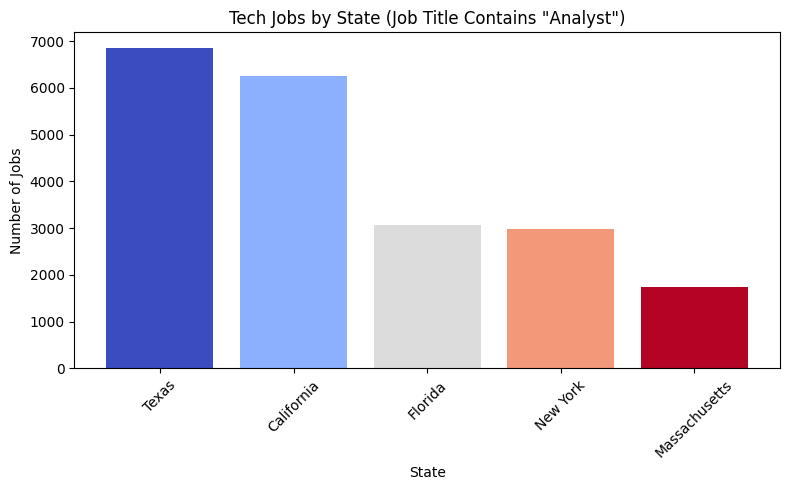

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Group by STATE_NAME and count jobs for NAICS_2022_6 = 518210
state_counts_jobs = final_df.groupby('STATE_NAME').size().reset_index(name='job_count')

# Sort state_counts_jobs from greatest to least by job_count
state_counts_jobs_sorted = state_counts_jobs.sort_values(by='job_count', ascending=False)

# Plot column chart
plt.figure(figsize=(8, 5))
colors = plt.cm.coolwarm(np.linspace(0, 1, len(state_counts_jobs_sorted)))
plt.bar(state_counts_jobs_sorted['STATE_NAME'], state_counts_jobs_sorted['job_count'], color=colors)
plt.xlabel('State')
plt.ylabel('Number of Jobs')
plt.title('Tech Jobs by State (Job Title Contains "Analyst")')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()